In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import re

In [4]:
import wordcloud

In [40]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [5]:
df = pd.read_csv('papers.csv')

In [6]:
df.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [7]:
df.drop(['id','event_type','pdf_name'],axis=1,inplace=True)

In [8]:
df.head(5)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [9]:
#Now we will see how papers have evolved over time by grouping them
groups = df.groupby('year')
counts = groups.size()

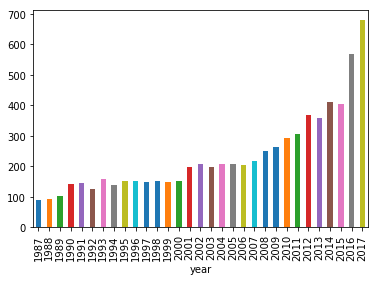

In [10]:
counts.plot(kind='bar')

In [11]:
df['title'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object

In [12]:
df['new_title'] = df['title'].map(lambda x:re.sub('[,\.!?]','',x))
df['new_title'] = df['new_title'].str.lower()

In [13]:
df['new_title'].head()

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: new_title, dtype: object

In [14]:
all_words = " ".join(df['new_title'])

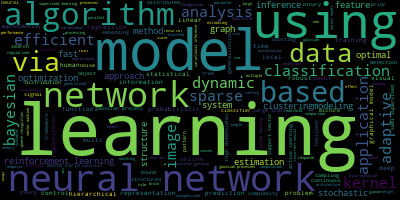

In [15]:
wc = wordcloud.WordCloud()
wc.generate(all_words)
wc.to_image()

In [18]:
# We will use LDA for topic detection
#firstly we will make document vectors
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['new_title'])

In [38]:
# top k most common words in the titles

def top_k_most_common_words(k,vectors,vectorizer):
    words = vectorizer.get_feature_names()
    word_count_arr = np.zeros(len(words))
    for doc_vec in X:
        word_count_arr = word_count_arr + doc_vec.toarray()[0]

    word_count_map = zip(word_count_arr,words)
    word_count_map=sorted(word_count_map,reverse=True)
    word_sorted = [w[1] for w in word_count_map]
    count_sorted = [w[0] for w in word_count_map]
    
    x_pos = np.arange(len(words)) 
    
    plt.bar(x_pos[:k], count_sorted[:k],align='center')
    plt.xticks(x_pos[:k], word_sorted[:k], rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('k most common words')
    plt.show()

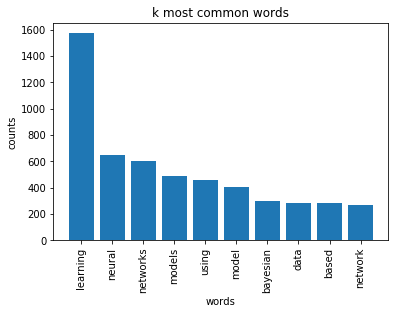

In [39]:
top_k_most_common_words(10,X,vectorizer)

In [42]:
#LDA analysis
num_topics = 10
num_words = 10
lda = LDA(n_components=num_topics)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [47]:
def print_topics(model,vectorizer,num_words):
    words = vectorizer.get_feature_names()
    for topic_idx,topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-num_words - 1:-1]]))

In [48]:
print_topics(lda, vectorizer, num_words)


Topic #0:
gaussian models inference multi process learning processes variational graphical vector

Topic #1:
sparse gradient optimization stochastic high linear dimensional learning matrix bayesian

Topic #2:
networks analysis bounds learning neural order generalization component visual training

Topic #3:
networks learning model deep neural using monte carlo adaptive based

Topic #4:
learning supervised kernel semi feature maximum multiple unsupervised algorithm networks

Topic #5:
clustering using spectral approximation data estimation kernel bayesian programming fast

Topic #6:
learning large algorithms classification scale based submodular metric multi regularization

Topic #7:
neural networks network recognition time analog vlsi speech learning convolutional

Topic #8:
learning models markov using model image hidden images probabilistic decision

Topic #9:
learning reinforcement online prediction based active modeling data model efficient
